In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
import graphviz
from sklearn.tree import export_graphviz
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score

## 2-a
Load the data. <br>
Create dummy variables. <br>
Separate target variable income > 50k. <br>
Create training and testing split. <br>

In [3]:
adults = pd.read_csv("adult-modified1.csv")
adults.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


In [4]:
adults_d = pd.get_dummies(adults, dtype = int)
adults_d.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0


In [5]:
income50k = adults_d['income_>50K']
income50k.value_counts()

income_>50K
0    7093
1    2319
Name: count, dtype: int64

In [6]:
adults_d = adults_d.drop(columns=['income_<=50K','income_>50K'])
adults_d.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0


In [7]:
adults_train, adults_test, target_train, target_test = train_test_split(adults_d, income50k, test_size=0.2, random_state=4378, stratify=income50k)
print(adults_test.shape)
adults_test.head()

(1883, 15)


,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
3455,26,9,44,1,0,0,1,0,0,0,0,0,1,0,1
438,37,9,60,1,0,0,1,0,0,0,0,0,1,1,0
8383,26,10,45,1,0,0,0,1,0,0,0,0,1,0,1
8832,46,14,50,1,0,0,1,0,0,0,0,0,1,0,1
2700,19,9,40,0,1,0,1,0,0,0,0,0,1,1,0


In [8]:
print(target_train.value_counts())

income_>50K
0    5674
1    1855
Name: count, dtype: int64


In [9]:
print(target_test.value_counts())

income_>50K
0    1419
1     464
Name: count, dtype: int64


Verify that the target classes have been stratified in the train and test sets to have proportional representation of each class.

## 2 <br> b-1
Normalize the data using min-max scaling. <br>
Perform KNN using K=10. <br>
Report the classification results. <br>

In [10]:
min_max_scaler = preprocessing.MinMaxScaler().fit(adults_train)
adults_train_norm = min_max_scaler.transform(adults_train)
adults_test_norm = min_max_scaler.transform(adults_test)

In [13]:
np.set_printoptions(precision=2, linewidth=100, suppress=True)
adults_train_norm[:5]

array([[0.38, 0.87, 0.48, 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ],
       [0.21, 0.6 , 0.4 , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ],
       [0.4 , 0.6 , 0.09, 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ],
       [0.27, 0.6 , 0.55, 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.6 , 0.35, 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

In [14]:
adults_test_norm[:5]

array([[0.12, 0.53, 0.44, 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ],
       [0.27, 0.53, 0.6 , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  ],
       [0.12, 0.6 , 0.45, 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ],
       [0.4 , 0.87, 0.5 , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ],
       [0.03, 0.53, 0.4 , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  ]])

In [12]:
knn = neighbors.KNeighborsClassifier(10, weights='distance')
knn.fit(adults_train_norm, target_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [13]:
knnpreds_train = knn.predict(adults_train_norm)
print(classification_report(target_train, knnpreds_train))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5674
           1       0.95      0.82      0.88      1855

    accuracy                           0.94      7529
   macro avg       0.95      0.90      0.92      7529
weighted avg       0.95      0.94      0.94      7529



Training accuracy is 94%.

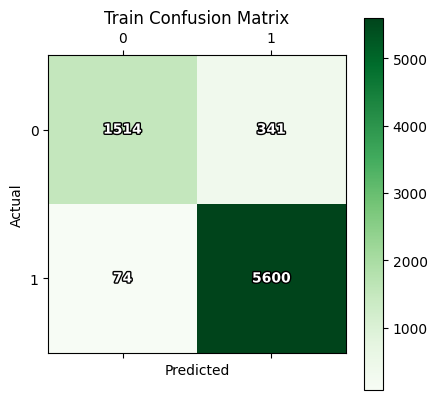

In [14]:
knntrain_cm = confusion_matrix(target_train, knnpreds_train, labels=[1,0])
plt.matshow(knntrain_cm, cmap='Greens')
for (i, j), value in np.ndenumerate(knntrain_cm):
    plt.text(j, i, f'{value}', ha='center', va='center', color='white', weight='bold',
             path_effects=[withStroke(linewidth=2, foreground='black')])
plt.title('Train Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [15]:
knnpreds_test = knn.predict(adults_test_norm)
print(classification_report(target_test, knnpreds_test))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1419
           1       0.58      0.51      0.55       464

    accuracy                           0.79      1883
   macro avg       0.72      0.70      0.70      1883
weighted avg       0.78      0.79      0.78      1883



Test accuracy is 79%.

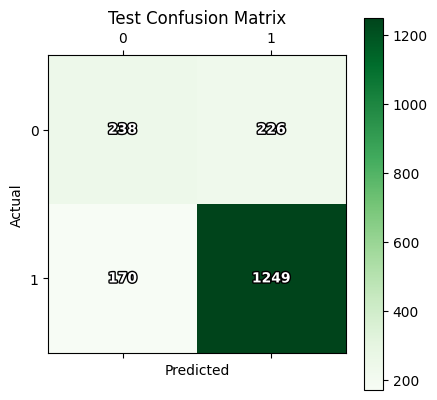

In [16]:
knntest_cm = confusion_matrix(target_test, knnpreds_test, labels=[1,0])
plt.matshow(knntest_cm, cmap='Greens')
for (i, j), value in np.ndenumerate(knntest_cm):
    plt.text(j, i, f'{value}', ha='center', va='center', color='white', weight='bold',
             path_effects=[withStroke(linewidth=2, foreground='black')])
plt.title('Test Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## b-2
Perform KNN with various values of K and both weighted and uniform distance. <br>
Select best performing model and report results for training and testing.

In [17]:
uniform_acc = []
weighted_acc = []
for k in range(5,101,5):
    knn_u = neighbors.KNeighborsClassifier(k)
    knn_u.fit(adults_train_norm, target_train)
    knn_u_preds = knn_u.predict(adults_test_norm)
    uniform_acc.append(accuracy_score(target_test, knn_u_preds))

    knn_w = neighbors.KNeighborsClassifier(k, weights='distance')
    knn_w.fit(adults_train_norm, target_train)
    knn_w_preds = knn_w.predict(adults_test_norm)
    weighted_acc.append(accuracy_score(target_test, knn_w_preds))


In [18]:
k = 5
print('Uniform Accuracy, K')
for acc in uniform_acc:
    print(acc,k)
    k += 5

Uniform Accuracy, K
0.7886351566648965 5
0.8040361125862985 10
0.8098778544875199 15
0.8125331917153479 20
0.8146574614976102 25
0.8173127987254382 30
0.8204992033988316 35
0.8178438661710037 40
0.8141263940520446 45
0.8183749336165693 50
0.8173127987254382 55
0.8167817312798725 60
0.8173127987254382 65
0.8194370685077005 70
0.822623473181094 75
0.8236856080722251 80
0.8210302708443973 85
0.8220924057355284 90
0.8231545406266596 95
0.8220924057355284 100


In [19]:
k = 5
print('Weighted Accuracy, K')
for acc in weighted_acc:
    print(acc,k)
    k += 5

Weighted Accuracy, K
0.7822623473181094 5
0.7896972915560276 10
0.7896972915560276 15
0.7934147636749868 20
0.7934147636749868 25
0.7939458311205523 30
0.7944768985661179 35
0.7934147636749868 40
0.7923526287838556 45
0.7939458311205523 50
0.7934147636749868 55
0.7923526287838556 60
0.7934147636749868 65
0.7955390334572491 70
0.7971322357939459 75
0.7987254381306426 80
0.7997875730217737 85
0.798194370685077 90
0.7987254381306426 95
0.7971322357939459 100


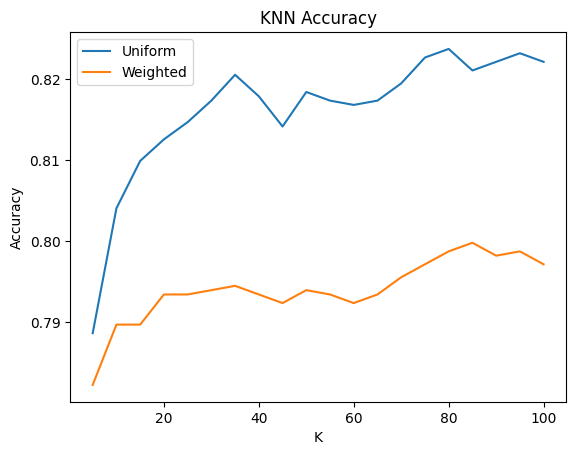

In [20]:
plt.plot(range(5,101,5), uniform_acc, label='Uniform')
plt.plot(range(5,101,5), weighted_acc, label='Weighted')
plt.title("KNN Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Highest accuracy is with uniform weights with K = 80.

In [21]:
knn_new = neighbors.KNeighborsClassifier(80)
knn_new.fit(adults_train_norm, target_train)

KNeighborsClassifier(n_neighbors=80)

In [22]:
knnpreds_train = knn_new.predict(adults_train_norm)
print(classification_report(target_train, knnpreds_train))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      5674
           1       0.68      0.48      0.56      1855

    accuracy                           0.81      7529
   macro avg       0.76      0.70      0.72      7529
weighted avg       0.80      0.81      0.80      7529



Training accuracy 81%.

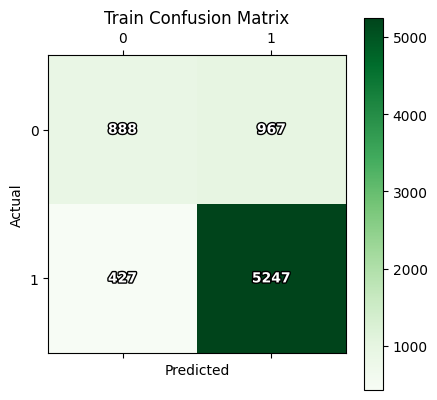

In [23]:
knntrain_cm = confusion_matrix(target_train, knnpreds_train, labels=[1,0])
plt.matshow(knntrain_cm, cmap='Greens')
for (i, j), value in np.ndenumerate(knntrain_cm):
    plt.text(j, i, f'{value}', ha='center', va='center', color='white', weight='bold',
             path_effects=[withStroke(linewidth=2, foreground='black')])
plt.title('Train Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [24]:
knnpreds_test = knn_new.predict(adults_test_norm)
print(classification_report(target_test, knnpreds_test))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1419
           1       0.70      0.49      0.58       464

    accuracy                           0.82      1883
   macro avg       0.78      0.71      0.73      1883
weighted avg       0.81      0.82      0.81      1883



Testing accuracy 82%.

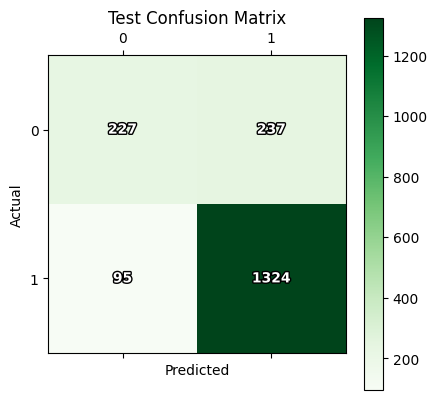

In [25]:
knntest_cm = confusion_matrix(target_test, knnpreds_test, labels=[1,0])
plt.matshow(knntest_cm, cmap='Greens')
for (i, j), value in np.ndenumerate(knntest_cm):
    plt.text(j, i, f'{value}', ha='center', va='center', color='white', weight='bold',
             path_effects=[withStroke(linewidth=2, foreground='black')])
plt.title('Test Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## b-3
Compare uniform KNN accuracy for training and testing. <br>
Look for instances of overfitting. <br>

In [26]:
train_acc = []
test_acc = []
for k in range(5,101,5):
    knn_u = neighbors.KNeighborsClassifier(k)
    knn_u.fit(adults_train_norm, target_train)
    knn_u_train = knn_u.predict(adults_train_norm)
    train_acc.append(accuracy_score(target_train, knn_u_train))
    knn_u_test = knn_u.predict(adults_test_norm)
    test_acc.append(accuracy_score(target_test, knn_u_test))

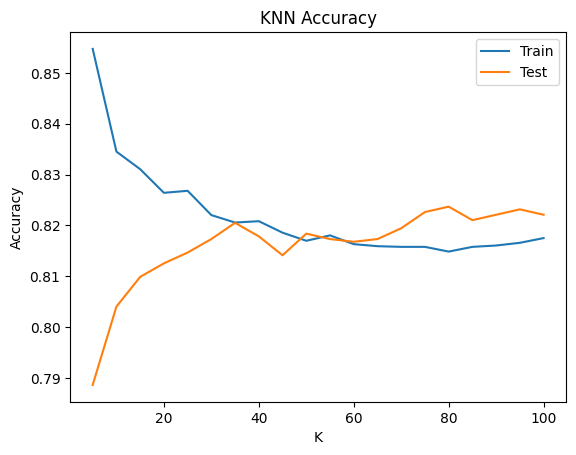

In [27]:
plt.plot(range(5,101,5), train_acc, label='Train')
plt.plot(range(5,101,5), test_acc, label='Test')
plt.title("KNN Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

There is some overfitting when K < 20, however the difference in accuracy is only about 6% so it's not a severe issue. A difference of 10% or less is generally deemed acceptable.

## 2-c
Use a decision tree classifier on the non-normalized dataset. <br>
Compare the training and testing accuracy and observe what it may say about bias-variance tradeoff. <br>
Create another decision tree using gini index and specified depth and split values. <br>
Analyze accuracies of new tree and produce visual of tree. <br>

In [28]:
treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(adults_train, target_train)

In [29]:
treepreds_train = treeclf.predict(adults_train)
print(classification_report(target_train, treepreds_train))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5674
           1       0.95      0.82      0.88      1855

    accuracy                           0.95      7529
   macro avg       0.95      0.90      0.92      7529
weighted avg       0.95      0.95      0.94      7529



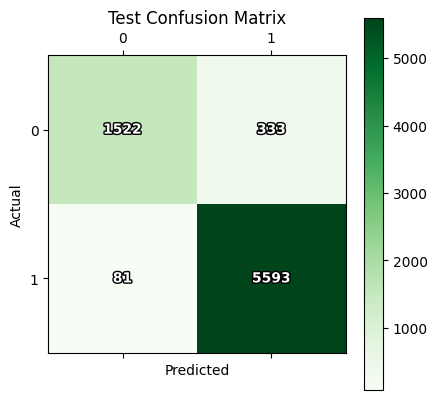

In [30]:
treetrain_cm = confusion_matrix(target_train, treepreds_train, labels=[1,0])
plt.matshow(treetrain_cm, cmap='Greens')
for (i, j), value in np.ndenumerate(treetrain_cm):
    plt.text(j, i, f'{value}', ha='center', va='center', color='white', weight='bold',
             path_effects=[withStroke(linewidth=2, foreground='black')])
plt.title('Test Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [31]:
treepreds_test = treeclf.predict(adults_test)
print(classification_report(target_test, treepreds_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1419
           1       0.50      0.45      0.47       464

    accuracy                           0.75      1883
   macro avg       0.66      0.65      0.66      1883
weighted avg       0.75      0.75      0.75      1883



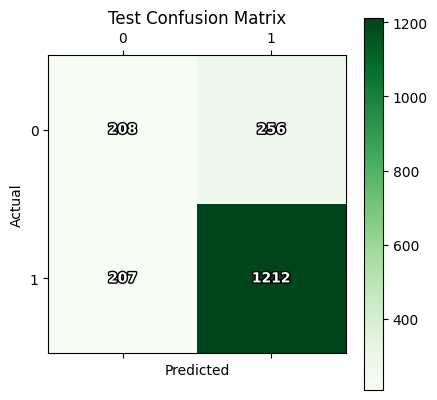

In [32]:
treetest_cm = confusion_matrix(target_test, treepreds_test, labels=[1,0])
plt.matshow(treetest_cm, cmap='Greens')
for (i, j), value in np.ndenumerate(treetest_cm):
    plt.text(j, i, f'{value}', ha='center', va='center', color='white', weight='bold',
             path_effects=[withStroke(linewidth=2, foreground='black')])
plt.title('Test Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The low bias of decision trees allows for the tree to fit the training set very well, leading to a high accuracy rate when training. However, the test set's accuracy is significantly lower, meaning the tree has high variance. This is when tuning decision trees is important, to minimize variance and reduce overfitting.

In [33]:
treeclf_gini = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=10, max_depth=4)
treeclf_gini = treeclf_gini.fit(adults_train, target_train)

In [34]:
ginipreds_train = treeclf_gini.predict(adults_train)
print(classification_report(target_train, ginipreds_train))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5674
           1       0.71      0.44      0.54      1855

    accuracy                           0.82      7529
   macro avg       0.77      0.69      0.71      7529
weighted avg       0.80      0.82      0.80      7529



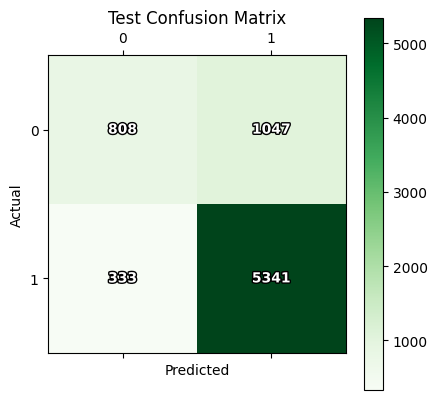

In [35]:
ginitrain_cm = confusion_matrix(target_train, ginipreds_train, labels=[1,0])
plt.matshow(ginitrain_cm, cmap='Greens')
for (i, j), value in np.ndenumerate(ginitrain_cm):
    plt.text(j, i, f'{value}', ha='center', va='center', color='white', weight='bold',
             path_effects=[withStroke(linewidth=2, foreground='black')])
plt.title('Test Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [36]:
ginipreds_test = treeclf_gini.predict(adults_test)
print(classification_report(target_test, ginipreds_test))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1419
           1       0.72      0.41      0.53       464

    accuracy                           0.82      1883
   macro avg       0.78      0.68      0.71      1883
weighted avg       0.80      0.82      0.80      1883



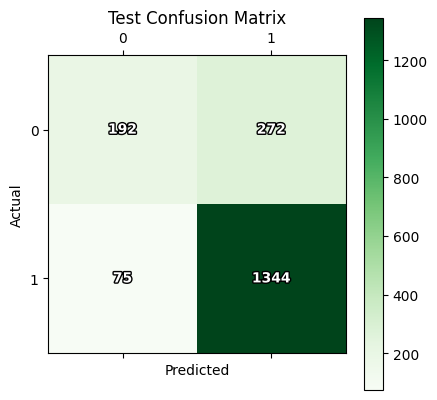

In [37]:
ginitest_cm = confusion_matrix(target_test, ginipreds_test, labels=[1,0])
plt.matshow(ginitest_cm, cmap='Greens')
for (i, j), value in np.ndenumerate(ginitest_cm):
    plt.text(j, i, f'{value}', ha='center', va='center', color='white', weight='bold',
             path_effects=[withStroke(linewidth=2, foreground='black')])
plt.title('Test Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [40]:
export_graphviz(treeclf_gini,out_file='tree.dot', feature_names=adults_train.columns)

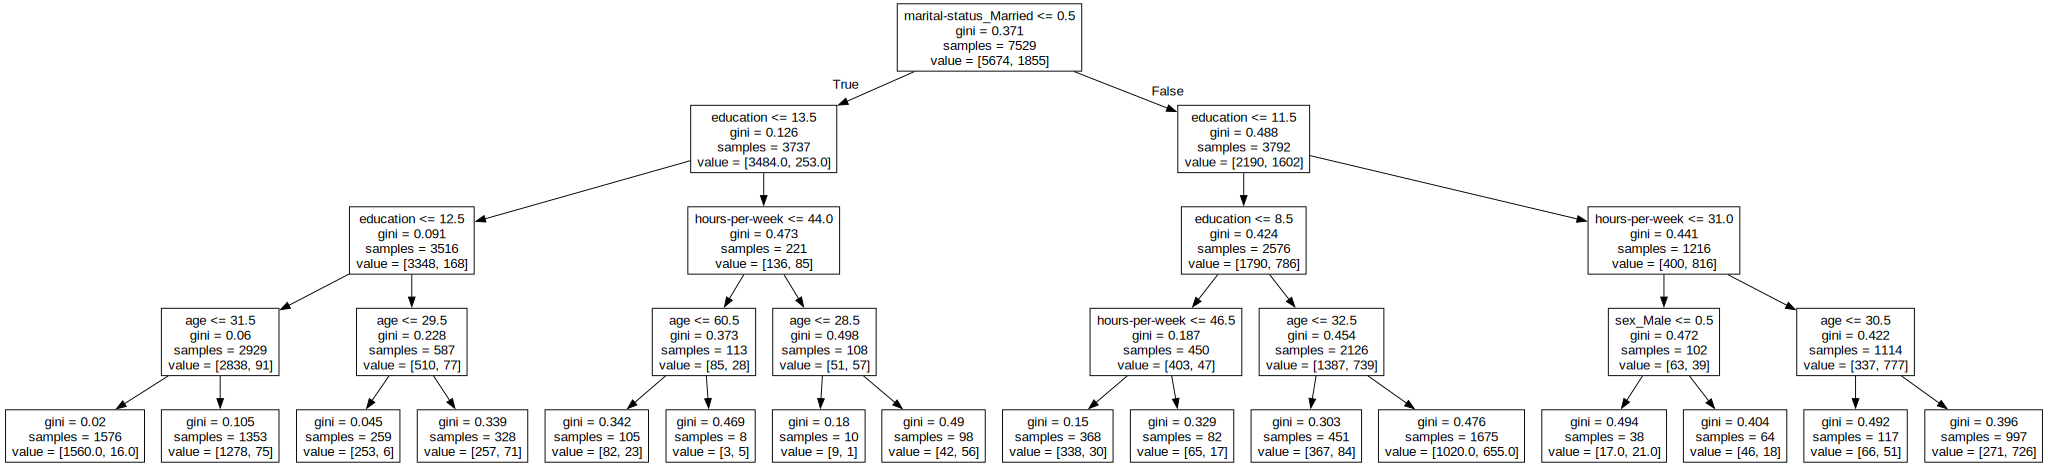

In [42]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 2-d
Create a 10 fold cross validation for Naive Bayes and LDA classifiers.<br>
Compare the cross validated accuracy to the whole training data accuracy. <br>
Test the model on the test data. <br>

In [18]:
kf = KFold(n_splits=10, shuffle=True, random_state=3476)

In [27]:
nbclf = naive_bayes.GaussianNB()
nb_scores = cross_val_score(nbclf, adults_train, target_train, cv=kf, scoring='accuracy')
nb_accuracy = np.mean(nb_scores) 
print(f"NB Average Accuracy: {nb_accuracy:.4f}")

NB Average Accuracy: 0.7150


In [29]:
nbclf = nbclf.fit(adults_train, target_train)
nbpreds_train = nbclf.predict(adults_train)
print(f"NB Train Accuracy: {accuracy_score(target_train, nbpreds_train):.4f}")

NB Train Accuracy: 0.7182


The Naive Bayes accuracy using the whole traning data is slightly higher.

In [30]:
nbpreds_test = nbclf.predict(adults_test)
print(f"NB Test Accuracy: {accuracy_score(target_test, nbpreds_test):.4f}")

NB Test Accuracy: 0.7212


Test accuracy of the Naive Bayes model is 72.12%.

In [31]:
ldclf = LinearDiscriminantAnalysis()
ld_scores = cross_val_score(ldclf, adults_train, target_train, cv=kf, scoring='accuracy')
ld_accuracy = np.mean(ld_scores) 
print(f"LDA Average Accuracy: {ld_accuracy:.4f}")

LDA Average Accuracy: 0.8057


In [33]:
ldclf = ldclf.fit(adults_train, target_train)
ldpreds_train = ldclf.predict(adults_train)
print(f"LDA Train Accuracy: {accuracy_score(target_train, ldpreds_train):.4f}")

LDA Train Accuracy: 0.8079


Like Naive Bayes, the Linear Discriminant Analysis model accuracy is slightly higher with the full training data.

In [35]:
ldpreds_test = ldclf.predict(adults_test)
print(f"LDA Test Accuracy: {accuracy_score(target_test, ldpreds_test):.4f}")

LDA Test Accuracy: 0.8178


Test accuracy for LDA is 81.78%.